In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import statsmodels.api as sm
import folium
%matplotlib inline
sns.set()

In [2]:
#Import Data
results_add_pitstops = pd.read_csv('results_full2(+pit_stops).csv')

In [3]:
#Analysis of Pit Stop Data
#NOTE: Race dates are from 2011 to 2019, so all data is essentially less than a decade old.
results_add_pitstops.head()

,Unnamed: 0,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,...,date,circuitRef,location,country,constructorRef,nationality_y,position_quali,stop,lap,milliseconds
0,0,20780,841,1,1,2,2,2,18.0,58,...,3/27/2011,albert_park,Melbourne,Australia,mclaren,British,2.0,1,16,23227
1,1,20780,841,1,1,2,2,2,18.0,58,...,3/27/2011,albert_park,Melbourne,Australia,mclaren,British,2.0,2,36,23199
2,2,20784,841,18,1,4,6,6,8.0,58,...,3/27/2011,albert_park,Melbourne,Australia,mclaren,British,4.0,1,17,16867
3,3,20784,841,18,1,4,6,6,8.0,58,...,3/27/2011,albert_park,Melbourne,Australia,mclaren,British,4.0,2,19,23303
4,4,20784,841,18,1,4,6,6,8.0,58,...,3/27/2011,albert_park,Melbourne,Australia,mclaren,British,4.0,3,37,22681


In [4]:
#Looking at pit stops with circuits
pitstop_by_circuit = results_add_pitstops.groupby('circuitRef')['stop'].nunique()
pitstop_by_circuit_df = pitstop_by_circuit.rename_axis('circuitRef').reset_index(name='stops')
pitstop_by_circuit_df = pitstop_by_circuit_df.sort_values(['stops'], ascending=False).reset_index(drop=True)

In [5]:
# of circuits that take part in F1
pitstop_by_circuit_df['circuitRef'].count()

27

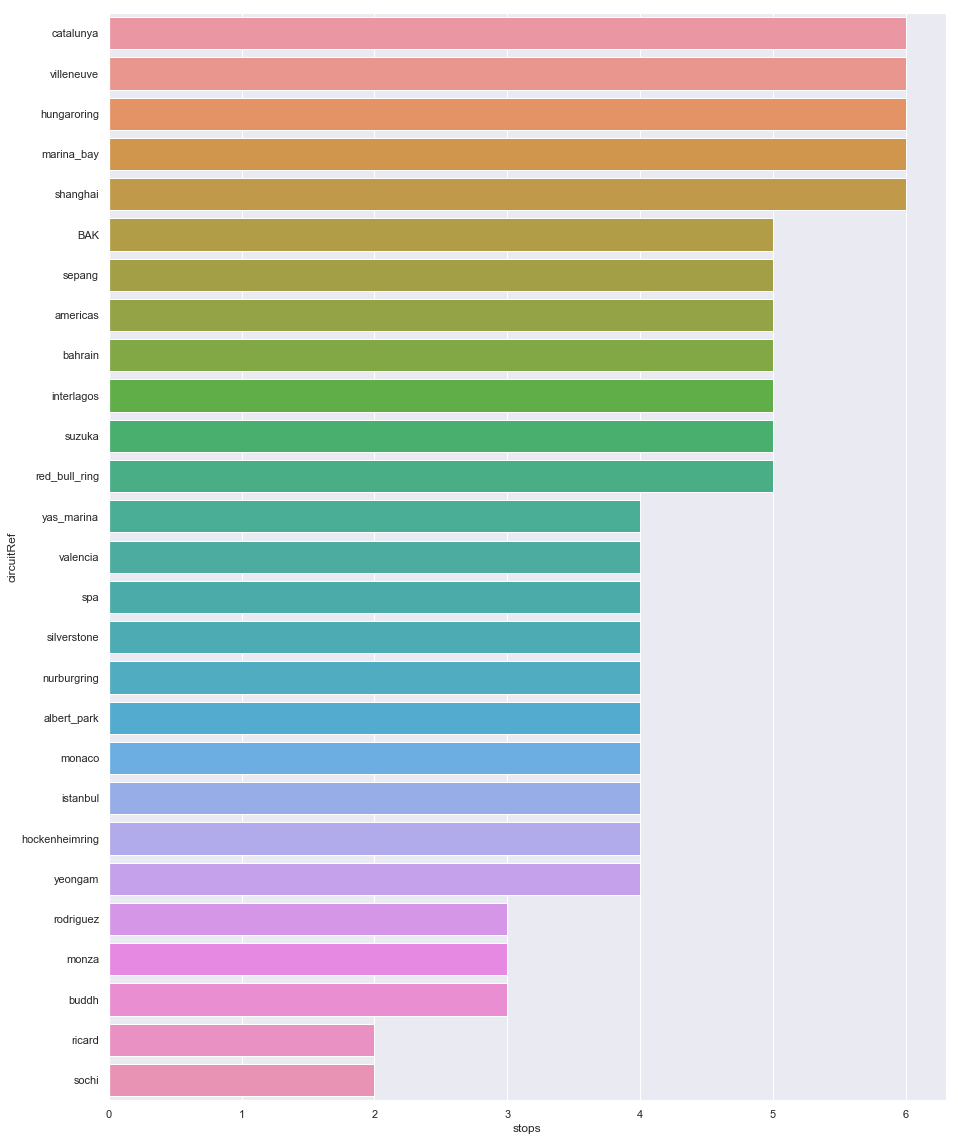

In [6]:
# What's the most pit stops that have ever been performed by any driver at each circuit?
plt.figure(figsize=(15,20))
sns.barplot(y='circuitRef', x='stops', data=pitstop_by_circuit_df);

In [7]:
#Looking at pit stops with constructors
pitstop_by_constructor = results_add_pitstops.groupby('constructorRef')['stop'].nunique()
pitstop_by_constructor_df = pitstop_by_constructor.rename_axis('constructorRef').reset_index(name='stops')
pitstop_by_constructor_df = pitstop_by_constructor_df.sort_values(['stops'], ascending=False).reset_index(drop=True)

In [8]:
# of constructors that take part in F1
pitstop_by_constructor_df['constructorRef'].count()

19

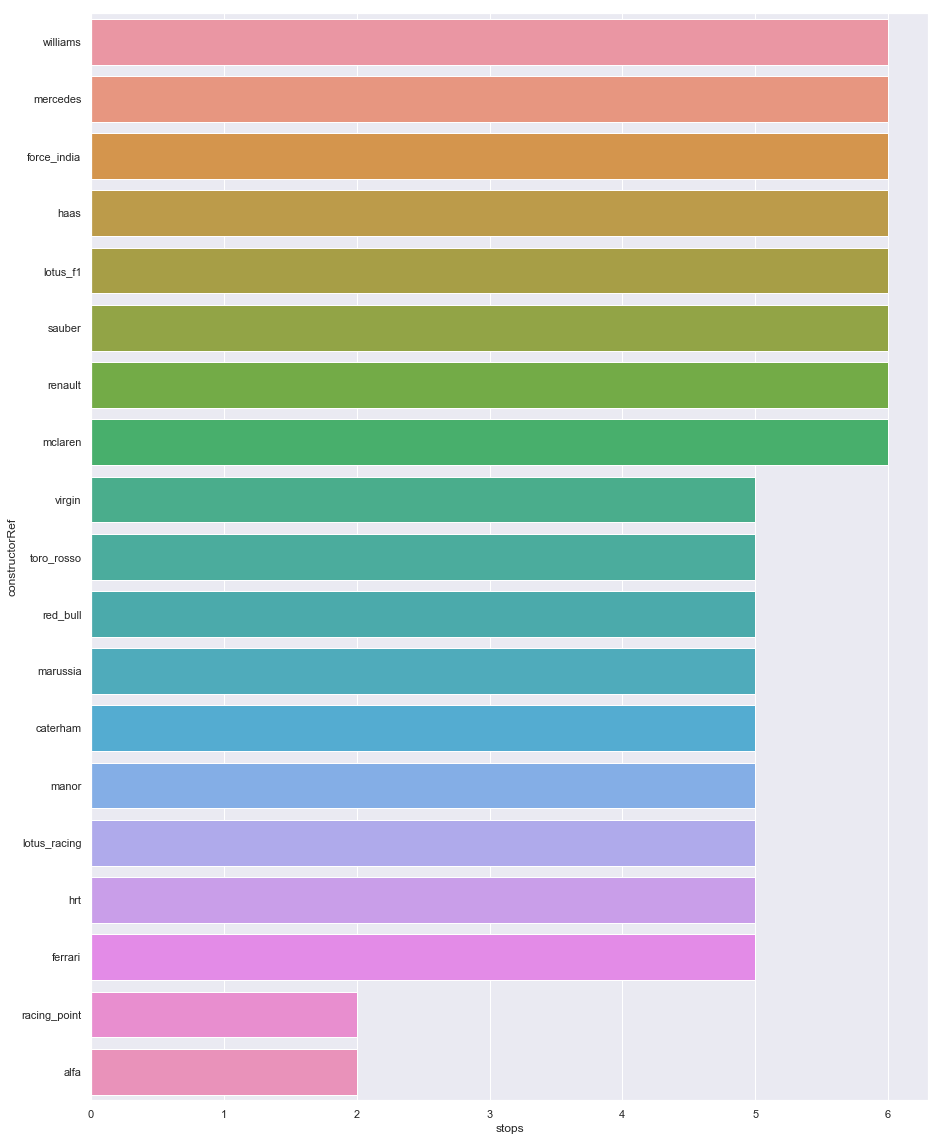

In [9]:
# What's the most pit stops each constructor has ever had (via one of it's drivers) in a single race?
plt.figure(figsize=(15,20))
sns.barplot(y='constructorRef', x='stops', data=pitstop_by_constructor_df);

In [10]:
#Looking at pit stops with drivers
pitstop_by_driver = results_add_pitstops.groupby('driverRef')['stop'].nunique()
pitstop_by_driver_df = pitstop_by_driver.rename_axis('driverRef').reset_index(name='stops')
pitstop_by_driver_df = pitstop_by_driver_df.sort_values(['stops'], ascending=False).reset_index(drop=True)

In [11]:
# How many drivers have participated in F1 and had pit stops?
pitstop_by_driver_df['driverRef'].count()

62

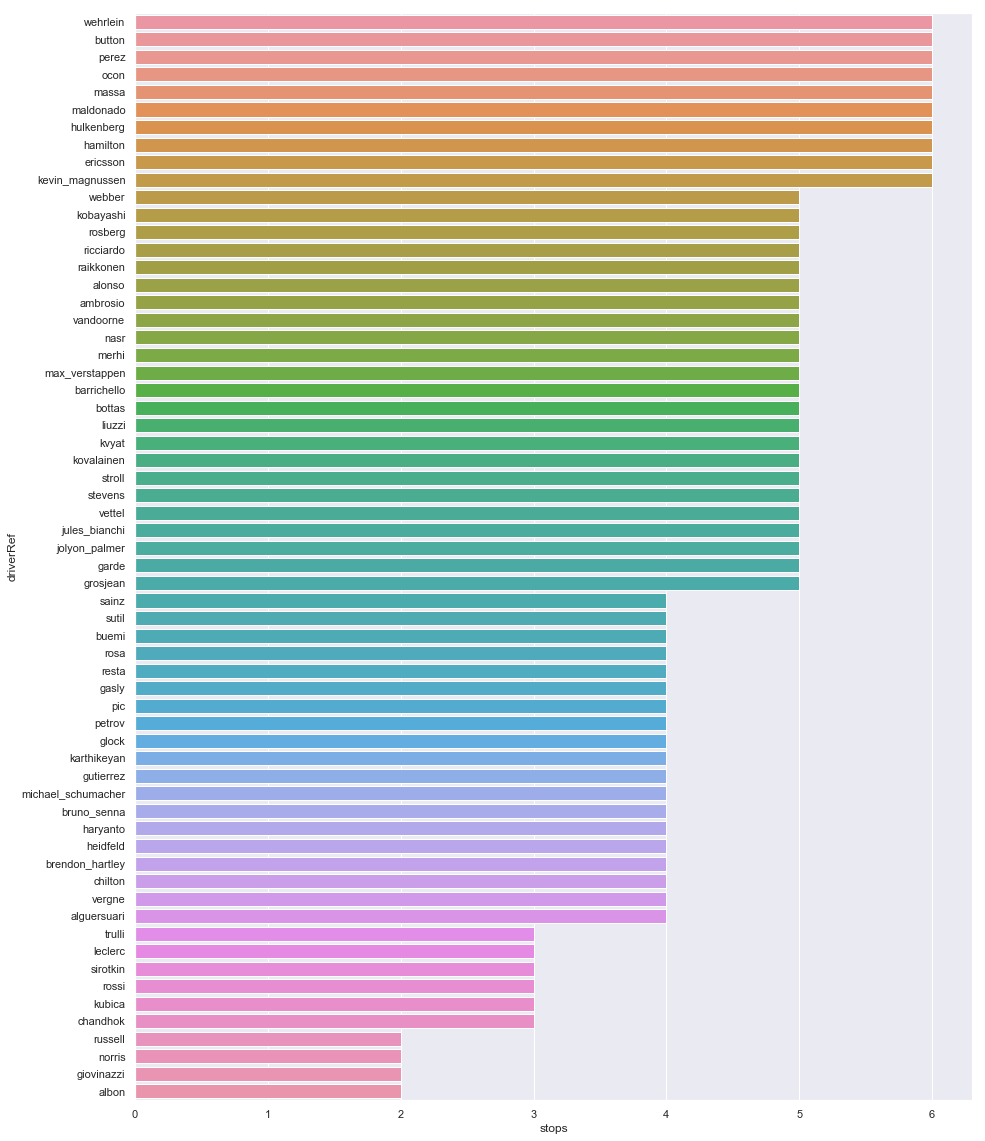

In [12]:
# What's the most pit stops each driver has ever had in a single race?
plt.figure(figsize=(15,20))
sns.barplot(y='driverRef', x='stops', data=pitstop_by_driver_df);

In [13]:
# What's the most pit stops that were performed (by any driver) at each circuit by year?
num_stops = results_add_pitstops.groupby(['circuitRef','year'])['stop'].max()
num_stops_df = num_stops.rename_axis(['circuit', 'year']).reset_index(name='stops')
num_stops_since2011 = num_stops_df[(num_stops_df['year'] > 2010) & (num_stops_df['stops'] > 0)]
num_stops_since2011 = num_stops_since2011.sort_values(['year'], ascending=True).reset_index(drop=True)

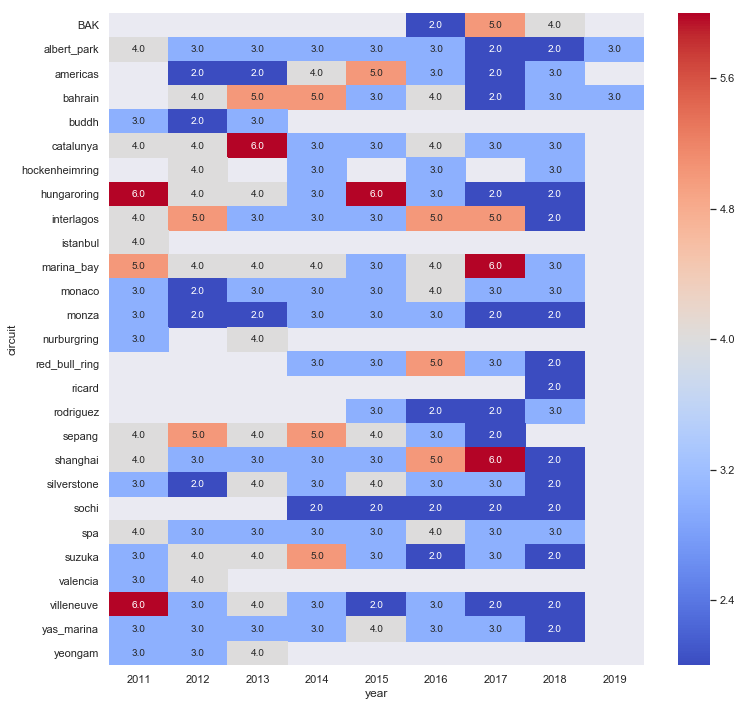

In [14]:
hmap = num_stops_since2011.pivot_table(index='circuit', values='stops', columns='year')
plt.figure(figsize=(12,12));
sns.heatmap(hmap, cmap='coolwarm', center=4, annot=True, fmt=".1f", annot_kws={'size':10},);

In [15]:
# What's the most pit stops that each driver ever performed in a single race by year?
num_stops = results_add_pitstops.groupby(['driverRef','year'])['stop'].max()
num_stops_df = num_stops.rename_axis(['driver', 'year']).reset_index(name='stops')
num_stops_since2011 = num_stops_df[(num_stops_df['year'] > 2010) & (num_stops_df['stops'] > 0)]
num_stops_since2011 = num_stops_since2011.sort_values(['year'], ascending=True).reset_index(drop=True)

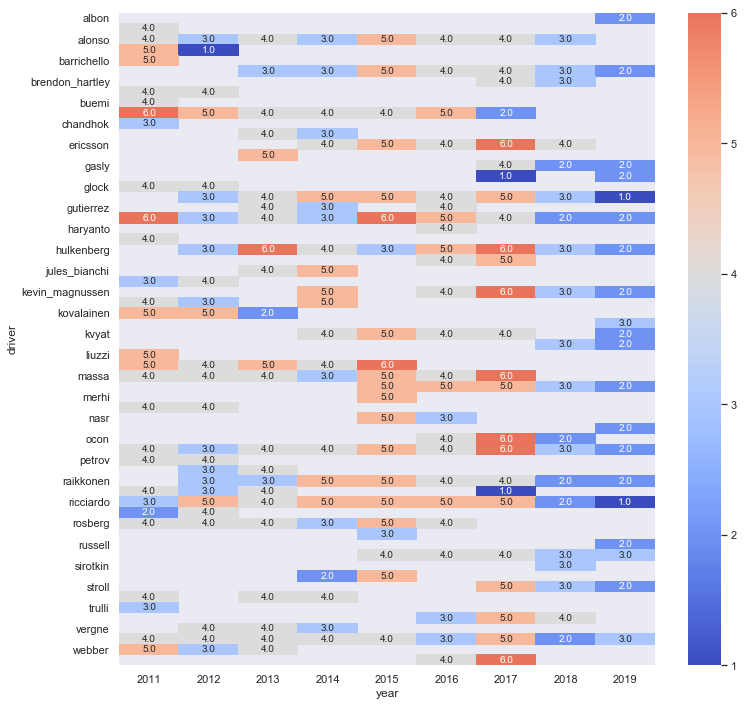

In [16]:
hmap = num_stops_since2011.pivot_table(index='driver', values='stops', columns='year')
plt.figure(figsize=(12,12));
sns.heatmap(hmap, cmap='coolwarm', center=4, annot=True, fmt=".1f", annot_kws={'size':10},);

In [17]:
# What's the most pit stops that each constructor ever performed (via one of it's drivers) in a single race by year?
num_stops = results_add_pitstops.groupby(['constructorRef','year'])['stop'].max()
num_stops_df = num_stops.rename_axis(['constructor', 'year']).reset_index(name='stops')
num_stops_since2011 = num_stops_df[(num_stops_df['year'] > 2010) & (num_stops_df['stops'] > 0)]
num_stops_since2011 = num_stops_since2011.sort_values(['year'], ascending=True).reset_index(drop=True)

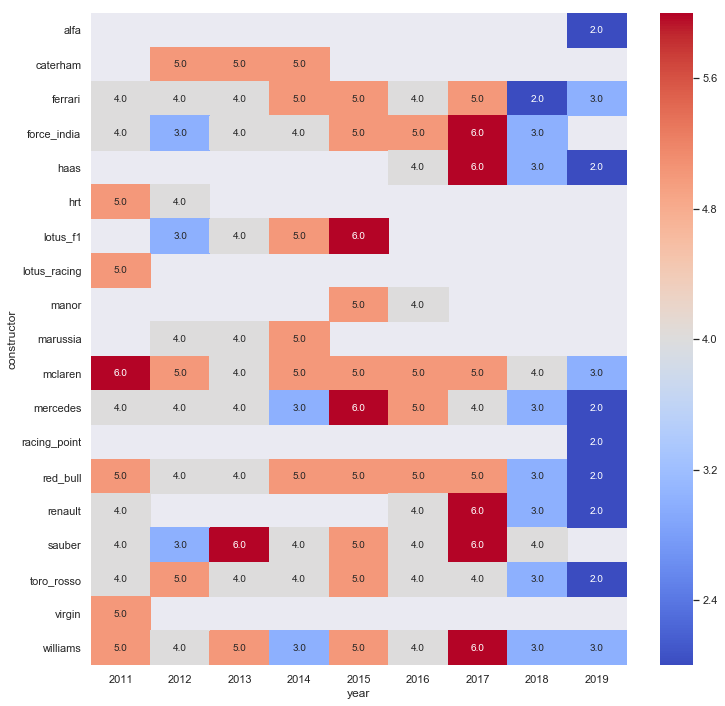

In [18]:
hmap = num_stops_since2011.pivot_table(index='constructor', values='stops', columns='year')
plt.figure(figsize=(12,12));
sns.heatmap(hmap, cmap='coolwarm', center=4, annot=True, fmt=".1f", annot_kws={'size':10},);

In [36]:
#fastest pit stop by circuit

circuit_milli = results_add_pitstops.groupby(['circuitRef','milliseconds'])['milliseconds'].count()
circuit_milli_df = circuit_milli.rename_axis(['circuit', 'fastest_pitstop']).reset_index(name='count')
circuit_milli_df = circuit_milli_df[circuit_milli_df['fastest_pitstop'] < 50000] 
circuit_milli_df = circuit_milli_df.drop(columns='count')
milli_summary = circuit_milli_df.groupby('circuit')['fastest_pitstop'].describe()
milli_summary

,count,mean,std,min,25%,50%,75%,max
circuit,,,,,,,,
BAK,114.0,21619.798246,4934.255253,14943.0,20078.75,20816.0,22029.50,44107.0
albert_park,271.0,23686.822878,3200.350987,16867.0,22174.00,23051.0,24169.50,48984.0
americas,217.0,25349.299539,3573.772865,18610.0,23817.00,24449.0,25323.00,44582.0
bahrain,389.0,25089.370180,3277.369035,18989.0,23207.00,24737.0,25704.00,49162.0
buddh,117.0,23911.547009,3492.971094,14919.0,21848.00,23541.0,24754.00,42529.0
catalunya,409.0,22066.366748,2712.306939,13259.0,20502.00,21974.0,22844.00,47910.0
hockenheimring,211.0,20375.213270,3472.380543,16831.0,18965.50,19547.0,20239.00,47942.0
hungaroring,411.0,21891.540146,3106.785176,13173.0,20681.50,22014.0,22818.50,49849.0
interlagos,379.0,23098.189974,3047.586588,14029.0,21594.50,23197.0,24239.00,38291.0


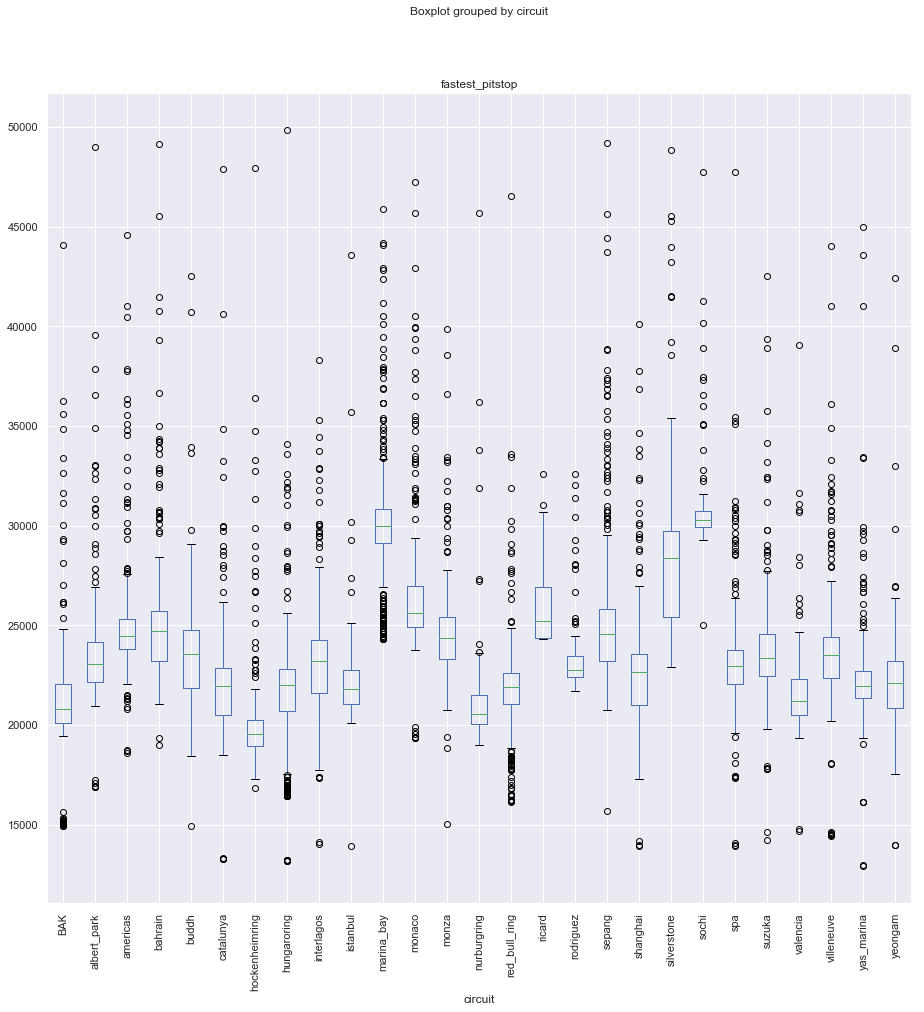

In [37]:
circuit_milli_df.boxplot(column=['fastest_pitstop'], by='circuit', figsize=(15,15), rot=90);

In [42]:
#fastest pit stop by constructor

constructor_milli = results_add_pitstops.groupby(['constructorRef','milliseconds'])['milliseconds'].count()
constructor_milli_df = constructor_milli.rename_axis(['constructor', 'fastest_pitstop']).reset_index(name='count')
constructor_milli_df = constructor_milli_df[constructor_milli_df['fastest_pitstop'] < 50000] 
constructor_milli_df = constructor_milli_df.drop(columns='count')
milli_summary = constructor_milli_df.groupby('constructor')['fastest_pitstop'].describe()
milli_summary

,count,mean,std,min,25%,50%,75%,max
constructor,,,,,,,,
alfa,6.0,25724.000000,1594.377872,23299.0,25065.25,25634.0,26790.75,27725.0
caterham,235.0,24681.034043,4267.151447,14250.0,22031.00,23545.0,26128.50,44428.0
ferrari,605.0,23511.971901,3589.923203,13259.0,21485.00,22762.0,24653.00,39041.0
force_india,577.0,24083.012132,4147.176523,14128.0,21802.00,23275.0,25158.00,47910.0
haas,212.0,25037.372642,4472.167822,15073.0,22656.75,23903.0,26327.00,41508.0
hrt,147.0,25964.952381,5304.384824,14160.0,22874.00,24497.0,27590.00,44170.0
lotus_f1,278.0,24126.154676,3900.675864,16120.0,21750.50,23311.5,25393.25,39980.0
lotus_racing,82.0,24156.780488,4221.863181,20652.0,22003.00,22624.0,24673.50,44037.0
manor,147.0,26192.034014,4748.276057,16218.0,23880.50,25367.0,27547.00,48861.0


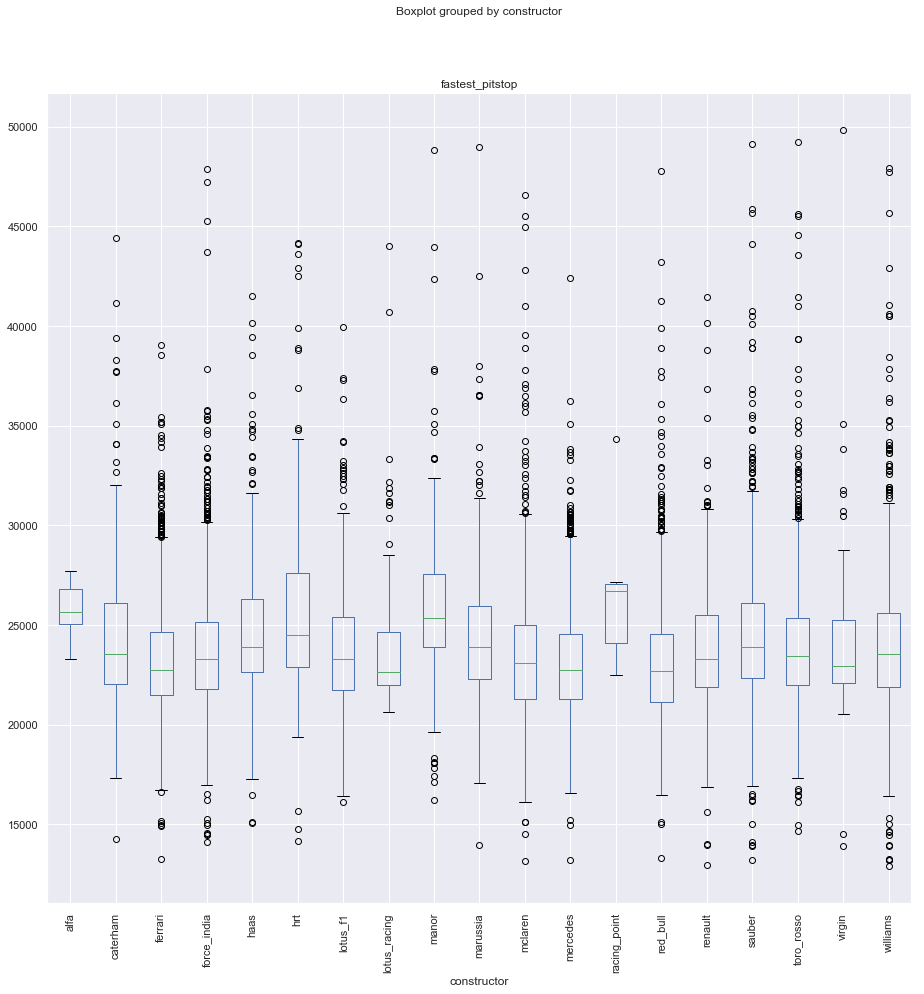

In [43]:
constructor_milli_df.boxplot(column=['fastest_pitstop'], by='constructor', figsize=(15,15), rot=90);

In [46]:
#fastest pit stop by driver

driver_milli = results_add_pitstops.groupby(['driverRef','milliseconds'])['milliseconds'].count()
driver_milli_df = driver_milli.rename_axis(['driver', 'fastest_pitstop']).reset_index(name='count')
driver_milli_df = driver_milli_df[driver_milli_df['fastest_pitstop'] < 50000] 
driver_milli_df = driver_milli_df.drop(columns='count')
milli_summary = driver_milli_df.groupby('driver')['fastest_pitstop'].describe()
milli_summary

,count,mean,std,min,25%,50%,75%,max
driver,,,,,,,,
albon,3.0,24093.666667,2044.911327,21780.0,23311.00,24842.0,25250.50,25659.0
alguersuari,43.0,23862.348837,3934.535713,20741.0,21840.50,22713.0,24381.00,43574.0
alonso,295.0,23368.457627,3663.854924,15104.0,21225.50,22864.0,24638.50,44990.0
ambrosio,42.0,24838.523810,5099.343857,14538.0,22426.50,23359.0,26046.00,49849.0
barrichello,50.0,24617.020000,5215.538239,16892.0,21650.25,22726.5,25655.25,47753.0
bottas,219.0,24649.150685,4055.706295,14978.0,22352.50,23763.0,25944.50,45695.0
brendon_hartley,34.0,23993.911765,4846.127716,17738.0,21431.50,23141.0,24318.75,41012.0
bruno_senna,61.0,23938.557377,5782.550984,12959.0,21520.00,22534.0,26269.00,47942.0
buemi,41.0,24024.317073,3195.628643,20360.0,21928.00,23100.0,25045.00,32827.0


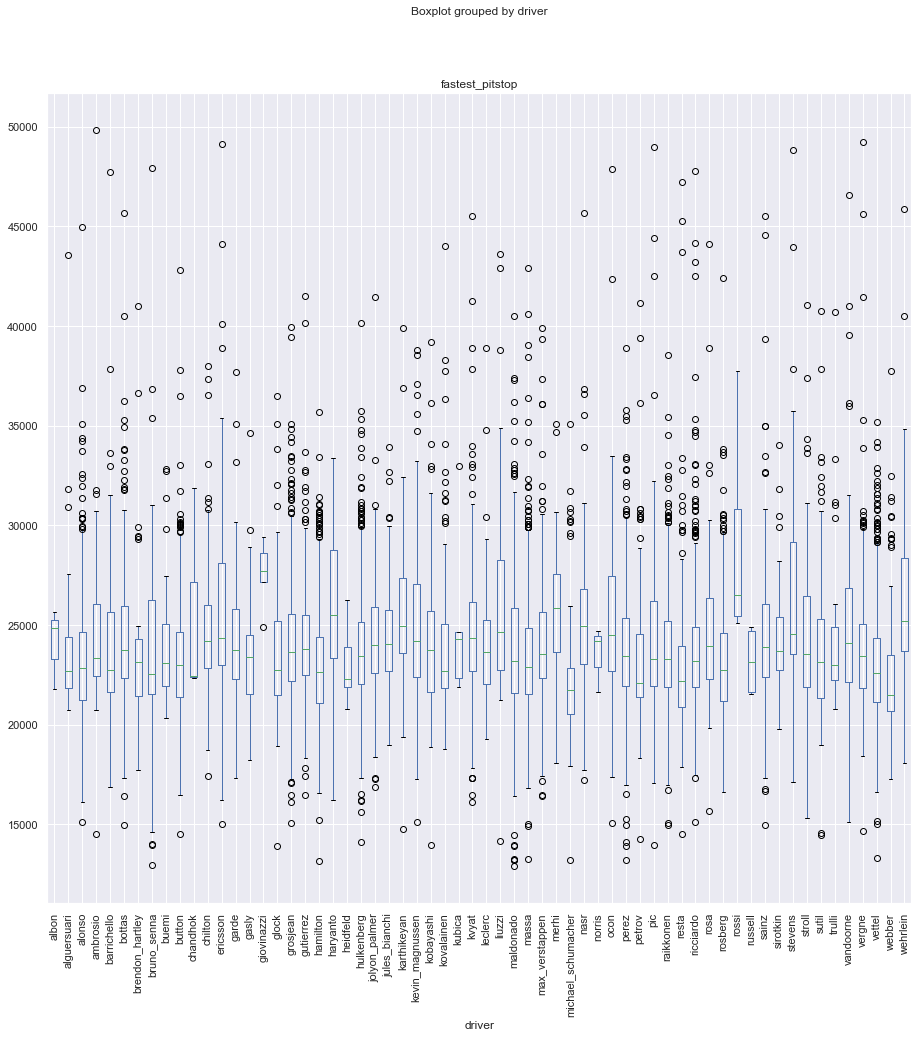

In [51]:
driver_milli_df.boxplot(column=['fastest_pitstop'], by='driver', figsize=(15,15), rot=90);